In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

In [5]:
data = pd.read_csv('Google_train_data.csv')
data.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


In [7]:
data["Close"]=pd.to_numeric(data.Close,errors='coerce')
data = data.dropna()
trainData = data.iloc[:,4:5].values

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1149 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1149 non-null   object 
 1   Open    1149 non-null   float64
 2   High    1149 non-null   float64
 3   Low     1149 non-null   float64
 4   Close   1149 non-null   float64
 5   Volume  1149 non-null   object 
dtypes: float64(4), object(2)
memory usage: 62.8+ KB


In [9]:
sc = MinMaxScaler(feature_range=(0,1))
trainData = sc.fit_transform(trainData)
trainData.shape

(1149, 1)

In [10]:
X_train = []
y_train = []

for i in range (60,1149): #60 : timestep // 1149 : length of the data
    X_train.append(trainData[i-60:i,0]) 
    y_train.append(trainData[i,0])

X_train,y_train = np.array(X_train),np.array(y_train)

In [11]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1)) #adding the batch_size axis
X_train.shape

(1089, 60, 1)

In [12]:
model = Sequential()

model.add(LSTM(units=100, return_sequences = True, input_shape =(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units =1))
model.compile(optimizer='adam',loss="mean_squared_error")

C:\Users\raj24\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [13]:
hist = model.fit(X_train, y_train, epochs = 20, batch_size = 32, verbose=2)

Epoch 1/20
35/35 - 12s - 356ms/step - loss: 0.0278
Epoch 2/20
35/35 - 4s - 121ms/step - loss: 0.0102
Epoch 3/20
35/35 - 5s - 136ms/step - loss: 0.0093
Epoch 4/20
35/35 - 4s - 125ms/step - loss: 0.0094
Epoch 5/20
35/35 - 6s - 165ms/step - loss: 0.0075
Epoch 6/20
35/35 - 5s - 150ms/step - loss: 0.0149
Epoch 7/20
35/35 - 5s - 132ms/step - loss: 0.0078
Epoch 8/20
35/35 - 5s - 140ms/step - loss: 0.0068
Epoch 9/20
35/35 - 5s - 145ms/step - loss: 0.0068
Epoch 10/20
35/35 - 8s - 216ms/step - loss: 0.0077
Epoch 11/20
35/35 - 7s - 199ms/step - loss: 0.0057
Epoch 12/20
35/35 - 8s - 220ms/step - loss: 0.0065
Epoch 13/20
35/35 - 5s - 147ms/step - loss: 0.0063
Epoch 14/20
35/35 - 6s - 177ms/step - loss: 0.0063
Epoch 15/20
35/35 - 7s - 190ms/step - loss: 0.0048
Epoch 16/20
35/35 - 8s - 221ms/step - loss: 0.0054
Epoch 17/20
35/35 - 9s - 262ms/step - loss: 0.0046
Epoch 18/20
35/35 - 11s - 307ms/step - loss: 0.0053
Epoch 19/20
35/35 - 10s - 285ms/step - loss: 0.0050
Epoch 20/20
35/35 - 10s - 297ms/step 

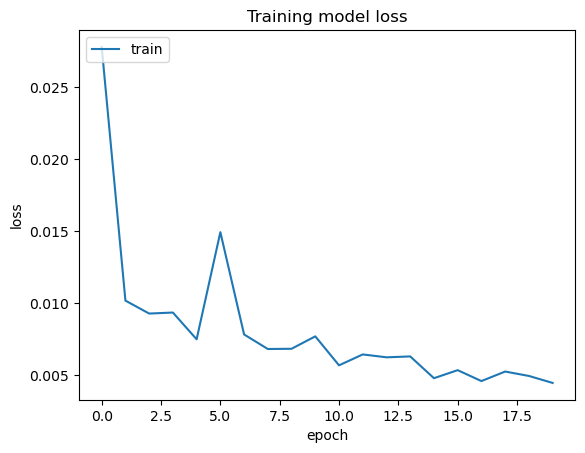

In [14]:
plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [15]:
testData = pd.read_csv('Google_test_data.csv')
testData["Close"]=pd.to_numeric(testData.Close,errors='coerce')
testData = testData.dropna()
testData = testData.iloc[:,4:5]
y_test = testData.iloc[60:,0:].values 
#input array for the model
inputClosing = testData.iloc[:,0:].values 
inputClosing_scaled = sc.transform(inputClosing)
inputClosing_scaled.shape
X_test = []
length = len(testData)
timestep = 60
for i in range(timestep,length):  
    X_test.append(inputClosing_scaled[i-timestep:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape

(192, 60, 1)

In [16]:
y_pred = model.predict(X_test)
y_pred

6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 139ms/step


array([[1.2057079],
       [1.2083441],
       [1.2187161],
       [1.2350255],
       [1.2498893],
       [1.2537991],
       [1.245403 ],
       [1.2303361],
       [1.2183392],
       [1.2127777],
       [1.2051845],
       [1.1941423],
       [1.1836534],
       [1.1737751],
       [1.1698973],
       [1.1722867],
       [1.1870326],
       [1.2125723],
       [1.2439325],
       [1.2768795],
       [1.2950605],
       [1.2979791],
       [1.2836354],
       [1.2580897],
       [1.2315564],
       [1.2127903],
       [1.2040424],
       [1.1999333],
       [1.1921953],
       [1.1817787],
       [1.1702406],
       [1.1571959],
       [1.1385059],
       [1.115144 ],
       [1.1027584],
       [1.107377 ],
       [1.1249838],
       [1.1482073],
       [1.1724524],
       [1.1881394],
       [1.2028993],
       [1.219036 ],
       [1.2368814],
       [1.253802 ],
       [1.2662612],
       [1.2701465],
       [1.2632889],
       [1.2548889],
       [1.2505912],
       [1.2532215],


In [17]:
predicted_price = sc.inverse_transform(y_pred)

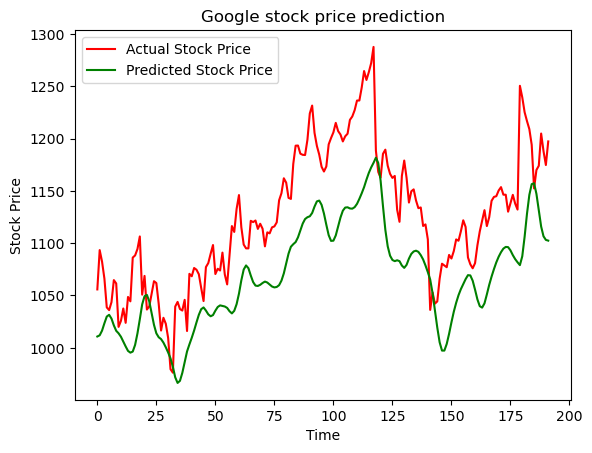

In [18]:
plt.plot(y_test, color = 'red', label = 'Actual Stock Price')
plt.plot(predicted_price, color = 'green', label = 'Predicted Stock Price')
plt.title('Google stock price prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()